In [139]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
n_samples = 15

In [151]:
X = np.random.rand(n_samples, 2)
Y = (((5*X[:, 0]-0.9))+(-4*X[:, 1]-0.1) > 0.5)
Y = np.array([(lambda elem: 1 if elem else -1)(xi) for xi in Y])

In [150]:
def adaline(data, target, weights, bias, learn_rate, eps):
  i = 0
  j = 0
  err = 0
  while True:
    i = i % len(data)
    y = weights @ data[i] + bias
    temp_err = err
    err = target[i] - y
    temp_w = weights
    weights = weights + 2 * learn_rate * err * data[i]
    bias = bias + 2 * learn_rate * err
    i += 1
    j += 1
    if (abs(err) < eps):
        break
  return weights, bias, j


In [176]:
#инициализация весов и смещения
W = np.array([100, -100])
b = 0
iters = 0

In [177]:
W, b, iters = adaline(X, Y, W, b, 0.1, 1e-2)
print(W, b, iters)

[ 4.57054196 -2.68106225] -2.031221213542649 265


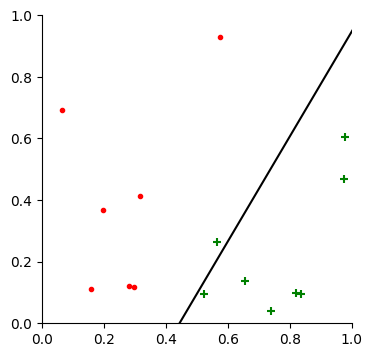

In [178]:
x = np.arange(-10, 10, 0.1)
fig = plt.figure(figsize=(4, 4))
ax = plt.gca()

for i in range(0, n_samples):
  if (Y[i] == 1):
    plt.scatter(X[i, 0], X[i, 1], color = "g", marker = "+")
  else:
    plt.scatter(X[i, 0], X[i, 1], color = "r", marker = ".")
y = - (W[0] / W[1]) * x - (b / W[1])
plt.plot(x, y, color = "black")
plt.ylim([0, 1])
plt.xlim([0, 1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [144]:
def eigg(data):
    mat = np.sum([el[:,np.newaxis]@el[np.newaxis,:] for el in data],0)/len(data)
    return (np.linalg.eig(mat)[0])

In [145]:
eigg(X)

array([0.0747832 , 0.75761342])